In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv('wine_data.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
#data = data[["country", "points", "province", "variety", "winery", "price"]]
df = df[["country", "points", "province", "variety", "price"]]

In [6]:
df = df.loc[(df['country'].isna() == False) & (df['points'].isna() == False) & \
            (df['variety'].isna() == False) & (df['province'].isna() == False)].copy()

df.count()

country     129907
points      129907
province    129907
variety     129907
price       120915
dtype: int64

In [7]:
df['variety_count']= df.variety.map(df.variety.value_counts())
df = df[(df.variety_count != 1)]


In [8]:
df.drop(df.loc[df['price']>500].index, inplace=True)

In [62]:
df2 = df.loc[df['price'].isna()]
df4 = df.loc[df['price'].isna() == False]
df2['price']= df3['price']
df2['Predict Price'] = "True"
df2.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,country,points,province,variety,price,variety_count,Predict Price
0,Italy,87,Sicily & Sardinia,White Blend,19.145648,2354,True
13,Italy,87,Sicily & Sardinia,Nerello Mascalese,27.418601,117,True
30,France,86,Beaujolais,Gamay,10.938160,1025,True
31,Italy,86,Sicily & Sardinia,Red Blend,21.233065,8935,True
32,Italy,86,Sicily & Sardinia,White Blend,14.552063,2354,True


In [63]:
df4['Predict Price'] = "False"
df4.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,points,province,variety,price,variety_count,Predict Price
1,Portugal,87,Douro,Portuguese Red,15.0,2466,False
2,US,87,Oregon,Pinot Gris,14.0,1452,False
3,US,87,Michigan,Riesling,13.0,5188,False
4,US,87,Oregon,Pinot Noir,65.0,13269,False
5,Spain,87,Northern Spain,Tempranillo-Merlot,15.0,7,False


In [71]:
#combine df2 & df4
result = pd.concat([df2, df4])
df33 = result.set_index("variety")
df33.head()

,country,points,province,price,variety_count,Predict Price
variety,,,,,,
White Blend,Italy,87,Sicily & Sardinia,19.145648,2354,True
Nerello Mascalese,Italy,87,Sicily & Sardinia,27.418601,117,True
Gamay,France,86,Beaujolais,10.938160,1025,True
Red Blend,Italy,86,Sicily & Sardinia,21.233065,8935,True
White Blend,Italy,86,Sicily & Sardinia,14.552063,2354,True


In [72]:
df33.to_csv('df33_price.csv')

In [33]:
data_new = pd.get_dummies(df)
# data_new is now encoded using dummy variables
data_new.head()
#data_new.to_csv('data_dummies.csv')

,points,price,variety_count,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,...,variety_Xinomavro,variety_Xynisteri,variety_Yapincak,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Çalkarası
0,87,NaN,2354,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,15.0,2466,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87,14.0,1452,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,13.0,5188,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,65.0,13269,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
hasprice = data_new.loc[data_new['price'].isna() == False].copy()
noprice = data_new.loc[data_new['price'].isna()]

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
y = hasprice["price"]
X = hasprice.drop(columns=["price"])
y = y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [37]:
'''import matplotlib.pyplot as plt
hasprice.hist(bins=20, figsize=(20,15))
plt.show()'''

'import matplotlib.pyplot as plt\nhasprice.hist(bins=20, figsize=(20,15))\nplt.show()'

In [38]:
#for no price data; "predictions" replace X_test_scaled with new data w/o prices
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6036839199134729, R2: 0.3475808374998869


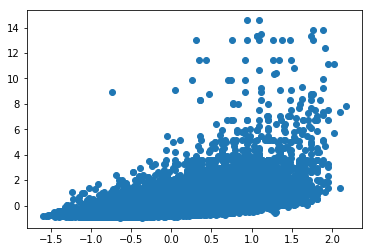

In [40]:
import matplotlib.pyplot as plt
plt.scatter(predictions, y_test_scaled)

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.592536660599208, R2: 0.3596280120991818


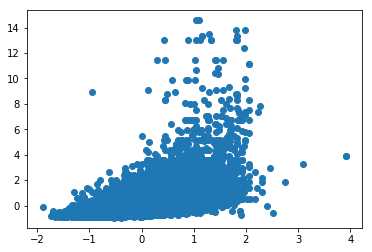

In [42]:
plt.scatter(predictions, y_test_scaled)

In [43]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5958162261028629, R2: 0.35608368814308655


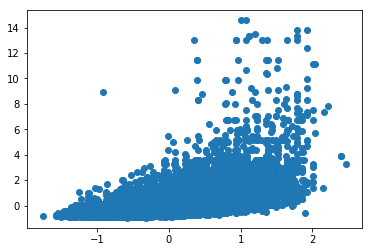

In [44]:
plt.scatter(predictions, y_test_scaled)

In [45]:
del noprice['price']
noprice.head()

,points,variety_count,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,...,variety_Xinomavro,variety_Xynisteri,variety_Yapincak,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Çalkarası
0,87,2354,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,87,117,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,86,1025,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,86,8935,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,86,2354,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
no_price_scaled = X_scaler.transform(noprice)


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [47]:
predictions_elastic = elasticnet.predict(no_price_scaled)
predictions_lasso = lasso.predict(no_price_scaled)
predictions_ridge = ridge.predict(no_price_scaled)

In [49]:
price_new = y_scaler.inverse_transform(predictions_ridge)
print (price_new)
price_new.astype(int)

[[19.14564815]
 [27.41860109]
 [10.93816032]
 ...
 [25.46861064]
 [36.3845203 ]
 [32.77251822]]


array([[19],
       [27],
       [10],
       ...,
       [25],
       [36],
       [32]])

In [50]:
np.array([[price_new]]).tolist()
price_new.astype(int)
len(price_new)

8983

In [73]:
noprice = data_new.loc[data_new['price'].isna()]

In [53]:
df3 = noprice.assign(price=price_new)
df3.head()

,points,price,variety_count,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,...,variety_Xinomavro,variety_Xynisteri,variety_Yapincak,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Çalkarası
0,87,19.145648,2354,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,87,27.418601,117,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,86,10.938160,1025,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,86,21.233065,8935,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,86,14.552063,2354,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df33

,country,points,province,price,variety_count,Predict Price
variety,,,,,,
White Blend,Italy,87,Sicily & Sardinia,19.145648,2354,True
Nerello Mascalese,Italy,87,Sicily & Sardinia,27.418601,117,True
Gamay,France,86,Beaujolais,10.938160,1025,True
Red Blend,Italy,86,Sicily & Sardinia,21.233065,8935,True
White Blend,Italy,86,Sicily & Sardinia,14.552063,2354,True
Red Blend,Italy,86,Sicily & Sardinia,21.233065,8935,True
Red Blend,Italy,85,Sicily & Sardinia,16.639479,8935,True
Touriga Nacional,Portugal,86,Tejo,15.363829,200,True
Chenin Blanc,South Africa,90,Walker Bay,32.062254,591,True
